<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Module 8: Ordinary Differential Equations



$Ankit Rijal$

$Min Sun Kim$

$Tylar Gifford$

$CPSMA - 441301$

$Dr. Nicolas Jacob$

First, let's import some packages.

In [49]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math

My function from project 1,
$$
f(x) = e^x
$$
Using that function my differential equation function will be,
$$
\frac{dy}{dx} = e^x\left(1-y\right)\quad\quad y(0) = 2
$$
After solving the above function, we get the function,
$$
y(x) = 1+ e^{-e^x+1}
$$


Now, Let's plot the solution on the graph.

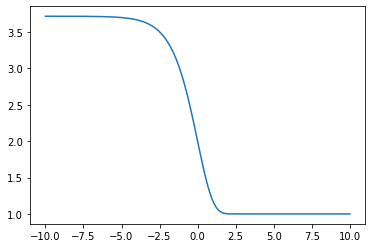

In [50]:
y = lambda x: 1+math.e**((-math.e**x)+1)
x = np.linspace(-10, 10, 1000)

plt.plot(x,y(x))

## Euler's Method

The Euler’s method is a straightforward numerical method used to estimate values of differential equations which cannot be solved by standard methods. This method uses Taylor’s Series for the solution and gives a reasonably good approximation if the value of step-size is reasonably small.

For the first method, let's approximate the solution by computing the next value using
$$
y_{i+1} = y_i + f(x_i,y_i)h
$$
for h the step size, $h = x_{i+1}-x_i$.

First let's define our differential equation function from above.

In [51]:
f = lambda x,y: (math.e**x)*(1-y)

Now, Let's create an euler method function

In [52]:
def eulerMethod(function,init,interval):
  eu_solution = []
  y=init
  h = interval[1]-interval[0]
  for i in interval:
    eu_solution.append([y])
    y = y + f(i,y)*h
  return np.array(eu_solution)

Now, using euler method function, let's graph the analytic solution and numerical solution

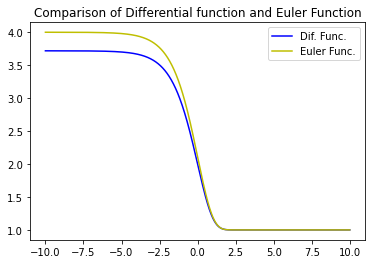

In [53]:
plt.plot(x, y(x), 'b', label="Dif. Func.")
plt.plot(x, eulerMethod(f,4,x), 'y', label="Euler Func.")
plt.title("Comparison of Differential function and Euler Function")
plt.legend(loc="upper right")

###Runge-Kutta 4th Order

The Runge-Kutta method finds approximate value of y for a given x where, only the first order ordinary differential equations can be solved by using the Runge Kutta 4th order method.

Much like Euler's method we are interested in solving a differential equation fo the form, $\frac{dy}{dx}= f(x,y)$.  We will have an initial point and iterate to the next using
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$

In [54]:
def rungeKutta(function, init, interval):
  ru_solution = []
  y = init
  h = interval[1]-interval[0]
  for i in interval:
    ru_solution.append([y])
    k1 = function(i,y)
    k2 = function(i+h/2,y+k1*h/2)
    k3 = function(i+ h/2,y+k2*h/2)
    k4 = function(i+ h , y+k3*h)
    y = y+h/6*(k1+2*k2+2*k3+k4)
  return np.array(ru_solution)

Now, Let's graph all three different solutions on the same interval.

Text(0.5, 1.0, 'Comparison adding Runge-Kutta 4th Order ')

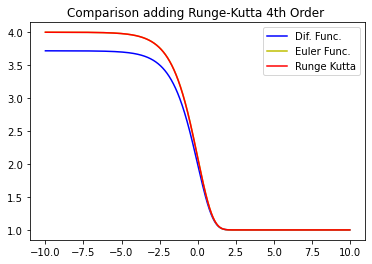

In [55]:
plt.plot(x, y(x),'b', label="Dif. Func.")
plt.plot(x, eulerMethod(f,4,x),'y', label="Euler Func.")
plt.plot(x,rungeKutta(f,4,x),'r', label="Runge Kutta")
plt.legend(loc="upper right")
plt.title("Comparison adding Runge-Kutta 4th Order ")

Now let's compute the error for our value

In [56]:
#function to compute error
def error(actual_value, estimate_value):

  error = (actual_value - estimate_value)/estimate_value
  return abs(error)*100

In [57]:
points = np.linspace(-10, 10, 20)
actual_value = [1+math.e**((-math.e**x)+1) for x in range(-10,10)]
euler_value = eulerMethod(f,4,points)
runge_value = rungeKutta(f,4,points)
euler_estimate = []
runge_estimate = []

for value in euler_value:
  euler_estimate.append(value[0]) 
for value in runge_value:
  runge_estimate.append(value[0]) 


In [58]:
euler_error = []
runge_error = []

for i in range(0,len(euler_estimate)):
  euler_error.append(error(actual_value[i],euler_estimate[i]))

for i in range(0,len(runge_estimate)):
  runge_error.append(error(actual_value[i],runge_estimate[i]))

In [59]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
    header=dict(values=['Points', 'Actual Value', "Euler's Estimated Value",'Runge-Kutta Estimated Value', 'Percentage Error for Euler', 'Percentage Error for Runge-Kutta'],
                line_color='darkslategray',
                fill_color='lightgreen',
                align='left'),
    cells=dict(values=[points, actual_value , euler_estimate, runge_estimate, euler_error, runge_error], 
               line_color='darkslategray',
               fill_color='white',
               align='left'))
])

fig.update_layout(width=1500, height=800)
fig.show()